## Exercises

#### 1. How would you define clustering? Can you name a few clustering algorithms?

A clustering algorithm is an unsupervised technique used to identify groups/clusters and group/classify instances based on their proximity in the feature space. Examples are: K-means, DBSCAN, Gaussian Mixture, BayesianGM

<ins>Book answer</ins>: In Machine Learning, clustering is the unsupervised task of grouping similar instances together. The notion of similarity depends on the task at hand: for example, in some cases two nearby instances will be considered similar, while in others similar instances may be far apart as long as they belong to the same densely packed group. Popular clustering algorithms include K-Means, DBSCAN, agglomerative clustering, BIRCH, Mean-Shift, affinity propagation, and spectral clustering.

#### 2. What are some of the main applications of clustering algorithms?

Customer segmentation, image segmentation, data preprocessing, dimensionality reduction, anomaly/novelty detection, semi-supervised learning, search engines.

<ins>Book answer</ins>:

#### 3. Describe two techniques to select the right number of clusters when using K-Means.

Silhouette score/diagrams and inertia plots.

<ins>Book answer</ins>: The elbow rule is a simple technique to select the number of clusters when using K-Means: just plot the inertia (the mean squared distance from each instance to its nearest centroid) as a function of the number of clusters, and find the point in the curve where the inertia stops dropping fast (the “elbow”). This is generally close to the optimal number of clusters. Another approach is to plot the silhou‐
ette score as a function of the number of clusters. There will often be a peak, and the optimal number of clusters is generally nearby. The silhouette score is the mean silhouette coefficient over all instances. This coefficient varies from +1 for instances that are well inside their cluster and far from other clusters, to –1 for instances that are very close to another cluster. You may also plot the silhouette diagrams and perform a more thorough analysis.

#### 4. What is label propagation? Why would you implement it, and how?

Hiring personel or experts to label millions of data can get quite prohibitive, therefore techniques like label propagation can be very useful. This is done by labeling only a small representative set of instances, and propagating these labels to all other instances that were identified to share the same cluster. The clustering is done by applying standard techniques like K-means. 


<ins>Book answer</ins>: Labeling a dataset is costly and time-consuming. Therefore, it is common to have plenty of unlabeled instances, but few labeled instances. Label propagation is a technique that consists in copying some (or all) of the labels from the labeled instances to similar unlabeled instances. This can greatly extend the number of labeled instances, and thereby allow a supervised algorithm to reach better performance (this is a form of semi-supervised learning). One approach is to use a clustering algorithm such as K-Means on all the instances, then for each cluster find the most common label or the label of the most representative instance (i.e., the one closest to the centroid) and propagate it to the unlabeled instances in the same cluster.

#### 5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

<ins>Book answer</ins>: K-Means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look for regions of high density.

#### 6. Can you think of a use case where active learning would be useful? How would you implement it?

Training LLMs, such as ChatGPT, benefit greatly from active learning to constraint satisfactory outputs.(Does it?)

<ins>Book answer</ins>: Active learning is useful whenever you have plenty of unlabeled instances but labeling is costly. In this case (which is very common), rather than randomly selecting instances to label, it is often preferable to perform active learning, where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them. A common approach is uncertainty sampling (see the description in “Active Learning” on page 255).

#### 7. What is the difference between anomaly detection and novelty detection?

<ins>Book answer</ins>: Many people use the terms anomaly detection and novelty detection interchangeably, but they are not exactly the same. In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances.
In novelty detection, the algorithm is trained on a dataset that is presumed to be “clean,” and the objective is to detect novelties strictly among new instances. Some algorithms work best for anomaly detection (e.g., Isolation Forest), while others are better suited for novelty detection (e.g., one-class SVM).

#### 8. What is a Gaussian mixture? What tasks can you use it for?

<ins>Book answer</ins>: A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. In other words, the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters may have different ellipsoidal shapes, sizes, orientations, and densities), and we don’t know which cluster each instance belongs to. This model is useful for density estimation, clustering, and anomaly detection.

#### 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

<ins>Book answer</ins>: One way to find the right number of clusters when using a Gaussian mixture model is to plot the Bayesian information criterion (BIC) or the Akaike information criterion (AIC) as a function of the number of clusters, then choose the number of clusters that minimizes the BIC or AIC. Another technique is to use a Bayesian Gaussian mixture model, which automatically selects the number of clusters.


#### 10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [1]:
#Standard libs
import numpy as np
import pandas as pd
#import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit

from timeit import default_timer as timer

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
faces = fetch_olivetti_faces()

In [3]:
X = faces['data']

In [28]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [10]:
len(X)

400

In [4]:
y = faces['target']

In [5]:
imgs = faces['images']

In [6]:
imgs.shape

(400, 64, 64)

In [7]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

In [8]:
rest_idxs, test_idxs = next(sss.split(X,y))

In [9]:
test_idxs

array([ 39,  76, 254, 152,  69,  24, 136, 370, 319, 209, 110, 390, 332,
        83, 265, 220, 104, 166, 292, 368, 218,   6, 307, 352, 320, 230,
        91,  12, 247, 146,  49, 183, 176,  56, 343, 385, 285, 277, 122,
       198])

In [10]:
X_rest = X[rest_idxs]
y_rest = y[rest_idxs]

X_test = X[test_idxs]
y_test = y[test_idxs]

In [11]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)

In [12]:
train_idxs, valid_idxs = next(sss2.split(X_rest,y_rest))

In [13]:
X_train = X_rest[train_idxs]
y_train = y_rest[train_idxs]

X_valid = X_rest[valid_idxs]
y_valid = y_rest[valid_idxs]

In [54]:
kmeans = KMeans(n_clusters=40, verbose=3, random_state=42)

In [55]:
start = timer()
kmeans.fit(X_train)
end = timer()

Initialization complete
Iteration 0, inertia 13342.40234375
Iteration 1, inertia 8394.7001953125
Iteration 2, inertia 8202.412109375
Iteration 3, inertia 8153.54931640625
Iteration 4, inertia 8147.57568359375
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 13402.2548828125
Iteration 1, inertia 8681.0908203125
Iteration 2, inertia 8431.8134765625
Iteration 3, inertia 8290.4033203125
Iteration 4, inertia 8256.380859375
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 13374.548828125
Iteration 1, inertia 8429.0478515625
Iteration 2, inertia 8308.3212890625
Iteration 3, inertia 8301.0302734375
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 13022.39453125
Iteration 1, inertia 8242.0751953125
Iteration 2, inertia 8097.17822265625
Iteration 3, inertia 8057.875
Iteration 4, inertia 8040.16650390625
Iteration 5, inertia 8034.33154296875
Converged at iteration 5: stric

In [56]:
print(f'###Elapsed time ={end-start}###')

###Elapsed time =6.859062195999286###


In [58]:
kmeans.labels_

array([19,  6,  8, 39,  3,  5,  5,  3, 10, 30,  7, 18, 22, 31, 28, 18, 28,
       22,  0,  9, 12, 33,  6, 26,  5, 17, 22, 12, 20, 29,  7, 30,  6, 29,
       18, 37,  5, 18, 10, 11, 12, 31,  8, 25,  0,  8,  6,  1, 30, 10,  4,
       10, 34, 30, 12,  3, 25,  4, 20, 24, 23, 10,  3, 22, 11, 30, 26, 14,
        6,  1, 30, 20, 15, 29, 21, 14, 10, 22, 34, 15, 35, 29, 36, 10,  6,
       10, 19, 16,  1,  2, 12, 30, 29, 27, 24, 22, 10, 39, 12, 34, 29, 11,
        7, 14,  6, 16,  6, 29,  6, 30, 29, 39, 15, 21,  6, 28,  6, 35, 37,
       23, 34,  8, 26,  3,  2, 28, 18, 16, 16, 23,  6, 38, 29, 12,  0, 22,
       29, 34, 30, 11, 27,  5, 30, 24,  4,  3, 32, 13, 28,  7,  8, 10,  5,
        6, 10, 22, 14,  0,  7, 12, 18, 16, 17, 13,  4, 23,  7,  6, 18,  7,
        7,  1,  0, 17,  6,  3, 17, 27, 21, 36,  2, 20,  7, 10, 28, 10,  0,
       17, 15, 30, 16, 34, 24,  1, 14,  5, 36, 21,  2, 28, 16, 21, 22, 34,
       17, 12, 35, 30, 12,  3, 20, 10, 38, 22, 20, 18, 15, 21, 31, 22, 27,
       29, 26, 18, 30,  7

In [60]:
X_train[kmeans.labels_ == 1]

array([[0.5289256 , 0.55785125, 0.57438016, ..., 0.4752066 , 0.47933885,
        0.4752066 ],
       [0.77272725, 0.8057851 , 0.79752064, ..., 0.2107438 , 0.19008264,
        0.13636364],
       [0.6363636 , 0.6528926 , 0.6694215 , ..., 0.26859504, 0.24380165,
        0.17768595],
       [0.60330576, 0.58677685, 0.5413223 , ..., 0.5289256 , 0.49586776,
        0.49586776],
       [0.5041322 , 0.5371901 , 0.5289256 , ..., 0.5       , 0.38016528,
        0.12396694],
       [0.49586776, 0.53305787, 0.5785124 , ..., 0.47933885, 0.45454547,
        0.45041323]], dtype=float32)

In [61]:
#Sorting the images according to the split
imgs_rest = imgs[rest_idxs]
imgs_test = imgs[test_idxs]

imgs_train = imgs_rest[train_idxs]
imgs_valid = imgs_rest[valid_idxs]


In [104]:
person_10 = imgs_train[kmeans.labels_ == 10]

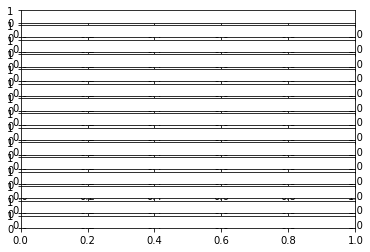

In [109]:
fig, ax = plt.subplots(len(person_10))

In [154]:
for i in range(len(person_10)):
    ax[i].imshow(person_10[i])

TypeError: 'AxesSubplot' object does not support indexing

In [111]:
fig.set_figheight(20)
fig.set_figwidth(20)

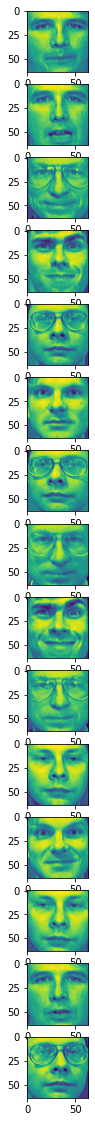

In [112]:
fig

In [103]:
kmeans.inertia_

8034.33154296875

In [145]:
from sklearn.metrics import silhouette_score

k=[]
model=[]
inertia=[]
silhouette=[]

for i,c in enumerate(range(60,130)):
    k.append(c)
    model.append(KMeans(n_clusters=c, verbose=3, random_state=42))
    model[i].fit(X_train)
    inertia.append(model[i].inertia_)
    silhouette.append(silhouette_score(X_train, model[i].labels_))
    

Initialization complete
Iteration 0, inertia 10183.248046875
Iteration 1, inertia 6315.85791015625
Iteration 2, inertia 6216.78955078125
Iteration 3, inertia 6183.09228515625
Iteration 4, inertia 6167.25244140625
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 10498.2890625
Iteration 1, inertia 6405.03857421875
Iteration 2, inertia 6317.7783203125
Iteration 3, inertia 6294.78369140625
Iteration 4, inertia 6269.69384765625
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 10427.5986328125
Iteration 1, inertia 6262.52490234375
Iteration 2, inertia 6185.45849609375
Iteration 3, inertia 6176.0888671875
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 10269.6611328125
Iteration 1, inertia 6283.43505859375
Iteration 2, inertia 6243.80224609375
Iteration 3, inertia 6233.21923828125
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inert

Initialization complete
Iteration 0, inertia 10013.6728515625
Iteration 1, inertia 6264.0244140625
Iteration 2, inertia 6127.630859375
Iteration 3, inertia 6100.71337890625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 9834.8642578125
Iteration 1, inertia 6108.9150390625
Iteration 2, inertia 6035.23583984375
Iteration 3, inertia 5978.19677734375
Iteration 4, inertia 5962.35595703125
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 9775.677734375
Iteration 1, inertia 5973.7333984375
Iteration 2, inertia 5949.40087890625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 10097.3681640625
Iteration 1, inertia 6095.60791015625
Iteration 2, inertia 6021.89599609375
Iteration 3, inertia 6007.744140625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 9688.5625
Iteration 1, inertia 5920.5263671875
Converged at iteration 1: stri

Initialization complete
Iteration 0, inertia 9511.4541015625
Iteration 1, inertia 5683.6318359375
Iteration 2, inertia 5625.43701171875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 9529.830078125
Iteration 1, inertia 5782.8701171875
Iteration 2, inertia 5720.64453125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 9369.1689453125
Iteration 1, inertia 5778.9072265625
Iteration 2, inertia 5744.1533203125
Iteration 3, inertia 5718.923828125
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 9599.3828125
Iteration 1, inertia 5855.30419921875
Iteration 2, inertia 5770.703125
Iteration 3, inertia 5763.1455078125
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 9519.595703125
Iteration 1, inertia 5763.7470703125
Iteration 2, inertia 5720.56103515625
Iteration 3, inertia 5702.83349609375
Converged at iteration 3: strict conve

Iteration 3, inertia 5474.9150390625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 8888.1201171875
Iteration 1, inertia 5461.15380859375
Iteration 2, inertia 5453.56689453125
Iteration 3, inertia 5444.71337890625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 9004.0400390625
Iteration 1, inertia 5335.08203125
Iteration 2, inertia 5283.9072265625
Iteration 3, inertia 5260.875
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 9024.677734375
Iteration 1, inertia 5336.33544921875
Iteration 2, inertia 5301.03662109375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8922.236328125
Iteration 1, inertia 5429.4814453125
Iteration 2, inertia 5418.69873046875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8936.490234375
Iteration 1, inertia 5406.1220703125
Iteration 2, inertia 5368.6

Iteration 1, inertia 5262.60498046875
Iteration 2, inertia 5219.66259765625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8527.3017578125
Iteration 1, inertia 5132.8154296875
Iteration 2, inertia 5125.7802734375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8470.4638671875
Iteration 1, inertia 5169.625
Iteration 2, inertia 5127.912109375
Iteration 3, inertia 5118.23193359375
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 8577.4033203125
Iteration 1, inertia 5205.09423828125
Iteration 2, inertia 5195.52294921875
Iteration 3, inertia 5185.9248046875
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 8748.927734375
Iteration 1, inertia 5141.97412109375
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8584.6279296875
Iteration 1, inertia 5236.296875
Iteration 2, inertia 5200.31

Iteration 3, inertia 4863.337890625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 8321.2255859375
Iteration 1, inertia 4946.58203125
Iteration 2, inertia 4934.64501953125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8278.724609375
Iteration 1, inertia 4806.083984375
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8235.9111328125
Iteration 1, inertia 4884.6337890625
Iteration 2, inertia 4872.712890625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8347.8759765625
Iteration 1, inertia 4926.68408203125
Iteration 2, inertia 4882.05517578125
Iteration 3, inertia 4862.62548828125
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 8376.845703125
Iteration 1, inertia 4906.50537109375
Iteration 2, inertia 4894.9248046875
Converged at iteration 2: strict convergence.
Initialization

Initialization complete
Iteration 0, inertia 7771.71923828125
Iteration 1, inertia 4728.08251953125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7902.9951171875
Iteration 1, inertia 4720.20654296875
Iteration 2, inertia 4704.64453125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7708.9951171875
Iteration 1, inertia 4602.85107421875
Iteration 2, inertia 4579.36767578125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7789.8740234375
Iteration 1, inertia 4628.44775390625
Iteration 2, inertia 4616.82958984375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7725.91015625
Iteration 1, inertia 4619.361328125
Iteration 2, inertia 4612.501953125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7860.15673828125
Iteration 1, inertia 4690.77294921875
Iteration 2, inertia 4673.71337

Initialization complete
Iteration 0, inertia 7531.25732421875
Iteration 1, inertia 4467.431640625
Iteration 2, inertia 4448.83642578125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7602.4736328125
Iteration 1, inertia 4437.3251953125
Iteration 2, inertia 4428.228515625
Iteration 3, inertia 4420.8603515625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7540.52197265625
Iteration 1, inertia 4496.51416015625
Iteration 2, inertia 4466.06005859375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7423.9931640625
Iteration 1, inertia 4446.662109375
Iteration 2, inertia 4400.7470703125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7407.80810546875
Iteration 1, inertia 4390.99951171875
Iteration 2, inertia 4336.146484375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7448.40625

Initialization complete
Iteration 0, inertia 7339.55615234375
Iteration 1, inertia 4217.63037109375
Iteration 2, inertia 4196.63427734375
Iteration 3, inertia 4169.70654296875
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7025.6513671875
Iteration 1, inertia 4153.76318359375
Iteration 2, inertia 4141.28662109375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7089.87548828125
Iteration 1, inertia 4156.294921875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7071.11181640625
Iteration 1, inertia 4135.88916015625
Iteration 2, inertia 4122.7734375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7060.92578125
Iteration 1, inertia 4194.080078125
Iteration 2, inertia 4149.31396484375
Iteration 3, inertia 4142.166015625
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7235.502441

Iteration 1, inertia 3920.02978515625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6976.21044921875
Iteration 1, inertia 4046.236572265625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6765.09326171875
Iteration 1, inertia 3954.283447265625
Iteration 2, inertia 3940.154541015625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6708.416015625
Iteration 1, inertia 3932.04443359375
Iteration 2, inertia 3923.623779296875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6666.697265625
Iteration 1, inertia 3955.635009765625
Iteration 2, inertia 3943.158447265625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6748.544921875
Iteration 1, inertia 3938.825927734375
Iteration 2, inertia 3903.146484375
Iteration 3, inertia 3878.4384765625
Converged at iteration 3: strict convergence

Initialization complete
Iteration 0, inertia 6423.48876953125
Iteration 1, inertia 3715.614990234375
Iteration 2, inertia 3689.246826171875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6344.5029296875
Iteration 1, inertia 3807.22216796875
Iteration 2, inertia 3778.29248046875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6537.25634765625
Iteration 1, inertia 3767.838134765625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6497.71337890625
Iteration 1, inertia 3771.552490234375
Iteration 2, inertia 3743.55322265625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6495.01708984375
Iteration 1, inertia 3756.739990234375
Iteration 2, inertia 3747.7587890625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6349.9599609375
Iteration 1, inertia 3762.876708984375
Iteration 2, in

Initialization complete
Iteration 0, inertia 6162.10400390625
Iteration 1, inertia 3546.960205078125
Iteration 2, inertia 3532.696044921875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6111.474609375
Iteration 1, inertia 3513.41357421875
Iteration 2, inertia 3502.493408203125
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6100.29443359375
Iteration 1, inertia 3489.795654296875
Iteration 2, inertia 3479.945556640625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6062.47607421875
Iteration 1, inertia 3534.056640625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6170.0791015625
Iteration 1, inertia 3568.195068359375
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6091.349609375
Iteration 1, inertia 3531.57275390625
Iteration 2, inertia 3503.335693359375
Iteration 3, inert

Initialization complete
Iteration 0, inertia 5797.04931640625
Iteration 1, inertia 3276.390869140625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5761.30517578125
Iteration 1, inertia 3296.913330078125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5759.5107421875
Iteration 1, inertia 3284.618408203125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5687.9912109375
Iteration 1, inertia 3374.59228515625
Iteration 2, inertia 3366.427734375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5979.2939453125
Iteration 1, inertia 3394.539794921875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5705.05224609375
Iteration 1, inertia 3242.50732421875
Iteration 2, inertia 3231.461669921875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 573

Initialization complete
Iteration 0, inertia 5524.0419921875
Iteration 1, inertia 3155.41943359375
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5478.857421875
Iteration 1, inertia 3085.987060546875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5473.18115234375
Iteration 1, inertia 3063.760986328125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5465.6826171875
Iteration 1, inertia 3073.206298828125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5470.64208984375
Iteration 1, inertia 3152.9541015625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5526.66796875
Iteration 1, inertia 3056.7861328125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5394.2138671875
Iteration 1, inertia 3103.110107421875
Converged at iteration 1: stri

Initialization complete
Iteration 0, inertia 5303.08935546875
Iteration 1, inertia 2964.8388671875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5080.2373046875
Iteration 1, inertia 2884.690185546875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5133.33203125
Iteration 1, inertia 2881.909423828125
Iteration 2, inertia 2868.75927734375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5043.0498046875
Iteration 1, inertia 2906.93115234375
Iteration 2, inertia 2895.037353515625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5114.94189453125
Iteration 1, inertia 2855.254150390625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5311.8544921875
Iteration 1, inertia 2938.32470703125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5073.1

Initialization complete
Iteration 0, inertia 4854.48388671875
Iteration 1, inertia 2774.748779296875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4952.998046875
Iteration 1, inertia 2724.42236328125
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4909.3310546875
Iteration 1, inertia 2751.39208984375
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4817.11865234375
Iteration 1, inertia 2677.43115234375
Iteration 2, inertia 2667.910400390625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4844.5244140625
Iteration 1, inertia 2734.14453125
Iteration 2, inertia 2718.730224609375
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4894.17724609375
Iteration 1, inertia 2789.710693359375
Converged at iteration 1: strict convergence.


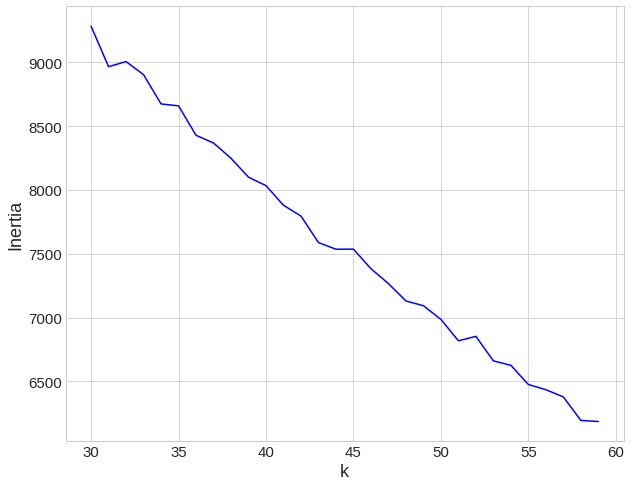

In [139]:
plt.figure(figsize=(10,8))
plt.plot(k,inertia, 'b-')
plt.xlabel('k', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15);

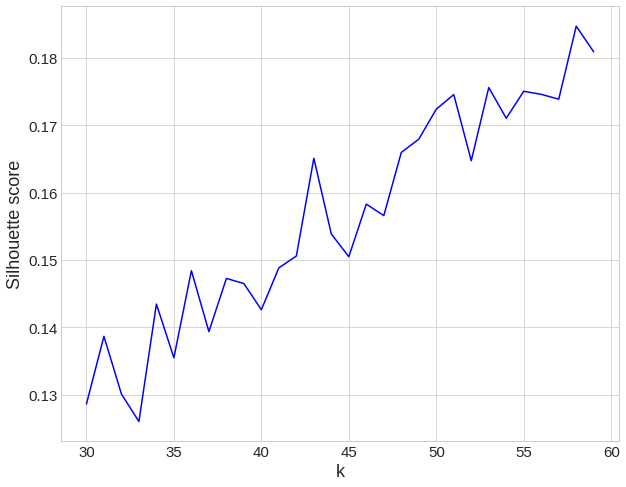

In [140]:
plt.figure(figsize=(10,8))
plt.plot(k,silhouette, 'b-')
plt.xlabel('k', fontsize=18)
plt.ylabel('Silhouette score', fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15);

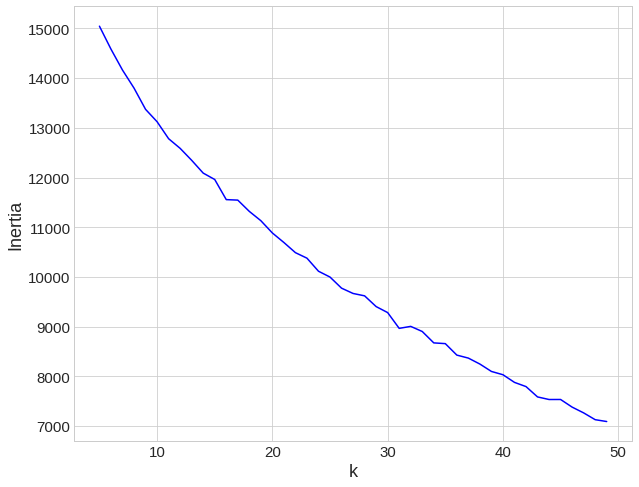

In [143]:
plt.figure(figsize=(10,8))
plt.plot(k,inertia, 'b-')
plt.xlabel('k', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15);

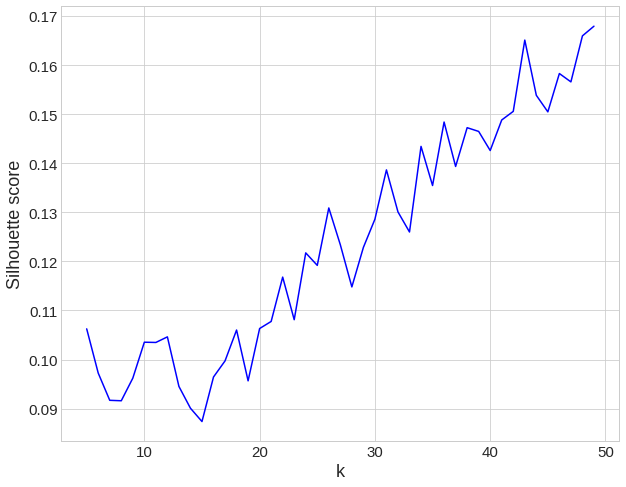

In [144]:
plt.figure(figsize=(10,8))
plt.plot(k,silhouette, 'b-')
plt.xlabel('k', fontsize=18)
plt.ylabel('Silhouette score', fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15);

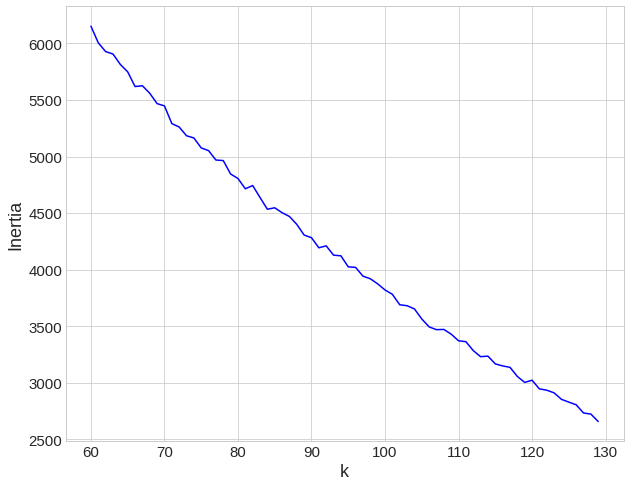

In [146]:
plt.figure(figsize=(10,8))
plt.plot(k,inertia, 'b-')
plt.xlabel('k', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15);

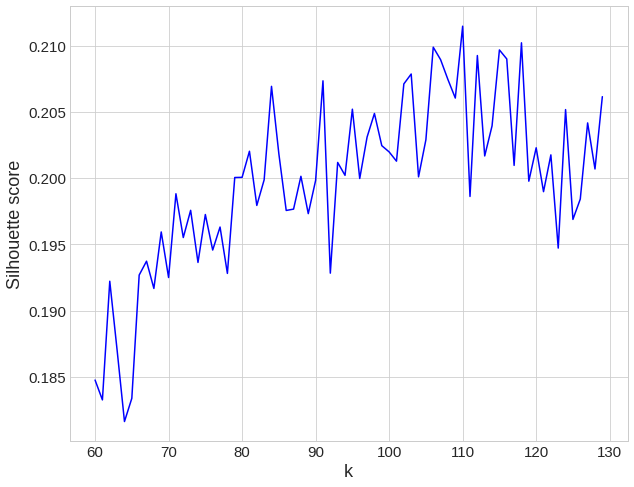

In [147]:
plt.figure(figsize=(10,8))
plt.plot(k,silhouette, 'b-')
plt.xlabel('k', fontsize=18)
plt.ylabel('Silhouette score', fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15);

In [149]:
np.argmax(silhouette)

50

In [151]:
k[np.argmax(silhouette)]

110

In [152]:
model[np.argmax(silhouette)]

KMeans(n_clusters=110, random_state=42, verbose=3)

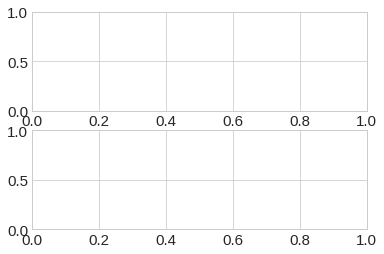

In [188]:
person = imgs_train[model[np.argmax(silhouette)].labels_ == 101]
fig, ax = plt.subplots(len(person))

In [189]:
for i in range(len(person)):
    ax[i].imshow(person[i])  


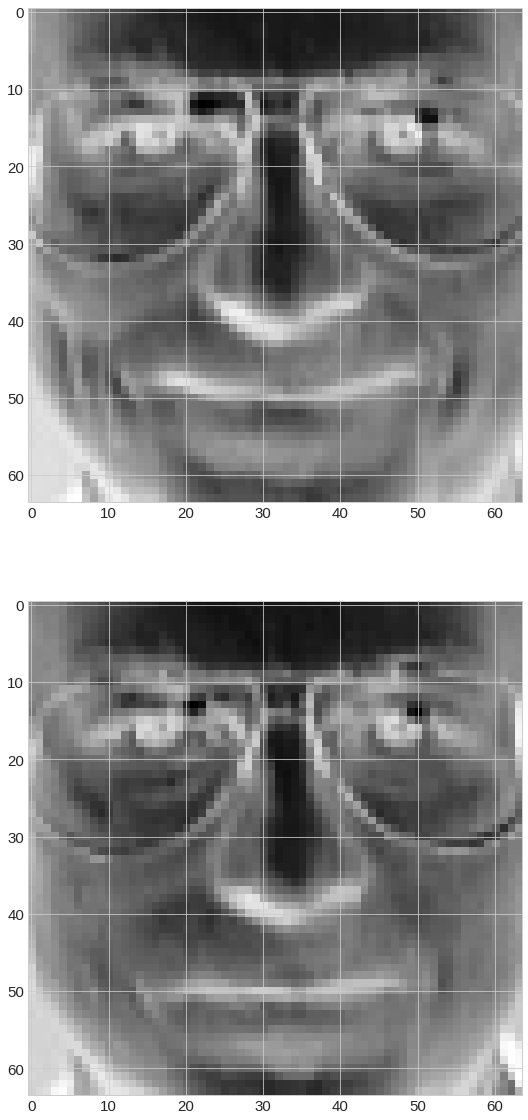

In [190]:
fig.set_figheight(20)
fig.set_figwidth(20)

fig

## Exercise 11

In [14]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression(multi_class='multinomial', C=0.1, verbose=3, max_iter=10000)

In [18]:
log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


LogisticRegression(C=0.1, max_iter=10000, multi_class='multinomial', verbose=3)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred = log_reg.predict(X_valid)

In [21]:
accuracy_score(y_valid, y_pred)

0.9625

In [22]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=110, verbose=3)

In [32]:
kmeans.fit(X_train)

Initialization complete
Iteration 0, inertia 6013.83740234375
Iteration 1, inertia 3398.954833984375
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5963.5009765625
Iteration 1, inertia 3478.5576171875
Iteration 2, inertia 3468.93310546875
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 6075.23876953125
Iteration 1, inertia 3442.412353515625
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5975.2958984375
Iteration 1, inertia 3373.678955078125
Iteration 2, inertia 3364.634765625
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5959.65380859375
Iteration 1, inertia 3417.649169921875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5906.2724609375
Iteration 1, inertia 3408.932373046875
Iteration 2, inertia 3400.848388671875
Converged at iteration 2: strict convergence.
Initializa

KMeans(n_clusters=110, verbose=3)

In [33]:
X_new = kmeans.transform(X_train)

In [34]:
X_new_valid = kmeans.transform(X_valid)

In [35]:
log_reg.fit(X_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.7s finished


LogisticRegression(C=0.1, max_iter=10000, multi_class='multinomial', verbose=3)

In [36]:
y_pred = log_reg.predict(X_new_valid)

In [37]:
accuracy_score(y_valid, y_pred)

0.9

In [38]:
from sklearn.pipeline import Pipeline

In [43]:
for k in [10,30,50,70,90,110]:
    pipeline = Pipeline ([
        ("kmeans", KMeans(n_clusters=k, random_state=42)),
        ("logreg", LogisticRegression(multi_class='multinomial', C=0.1, max_iter=10000))
    ])
    
    pipeline.fit(X_train, y_train)
    print(k, pipeline.score(X_valid, y_valid))
    

10 0.5375
30 0.75
50 0.825
70 0.8375
90 0.875
110 0.875
